<a href="https://colab.research.google.com/github/ZeinabNader/tasks-in-section/blob/main/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install pyopenms
import pyopenms
print ("Avogadro's number is ",pyopenms.Constants.AVOGADRO)





Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Avogadro's number is  6.0221367e+23


In [10]:
from pyopenms import *
edb = ElementDB()
#edb = hasElement("O")
oxygen = edb.getElement("O")
print(oxygen.getName())
print(oxygen.getSymbol())
print(oxygen.getMonoWeight())
print(oxygen.getAverageWeight())
print("one mole of oxygen weights",2*oxygen.getAverageWeight(),"grams")


Oxygen
O
15.994915
15.999405323160001
one mole of oxygen weights 31.998810646320003 grams


In [11]:
sulfur = edb.getElement("S")
print (sulfur.getMonoWeight())
print (sulfur.getAverageWeight())
isotopes = sulfur.getIsotopeDistribution()
print ("one mole of 1602 weights",2*oxygen.getAverageWeight(),"grams")

31.97207073
32.066084735289
one mole of 1602 weights 31.998810646320003 grams


In [13]:
edb = ElementDB()
oxygen_isoDist = {"mass":[],"abundance":[]}
oxygen = edb.getElement("O")
isotopes=oxygen.getIsotopeDistribution()
for iso in isotopes.getContainer():
  print ("oxygen isotope",iso.getMZ(),"has abundance",iso.getIntensity()*100,"%")
  oxygen_isoDist["mass"].append(iso.getMZ())
  oxygen_isoDist["abundance"].append((iso.getIntensity()*100))



oxygen isotope 15.994915 has abundance 99.75699782371521 %
oxygen isotope 16.999132 has abundance 0.03800000122282654 %
oxygen isotope 17.999169 has abundance 0.20500000100582838 %


NameError: ignored

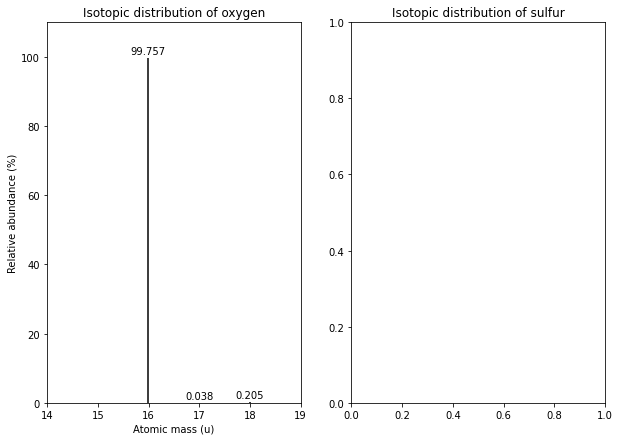

In [39]:

import math
from matplotlib import pyplot as plt

# very simple overlappping correction of annotations
def adjustText(x1, y1, x2, y2):
    if y1 > y2:
        plt.annotate('%0.3f' % (y2), xy=(x2, y2), xytext=(x2+0.5,y2+9),
                     textcoords='data',
                     arrowprops=dict(arrowstyle="->", color='r', lw=0.5),
                     horizontalalignment='right', verticalalignment='top')
    else:
        plt.annotate('%0.3f' % (y1), xy=(x1, y1), xytext=(x1+0.5,y1+9),
                     textcoords='data',
                     arrowprops=dict(arrowstyle="->", color='r', lw=0.5),
                     horizontalalignment='right', verticalalignment='top')


def plotDistribution(distribution):
    n = len(distribution["mass"])
    for i in range(0, n):
        plt.vlines(x=distribution["mass"][i], ymin=0, ymax=distribution["abundance"][i])
        if int(distribution["mass"][i - 1]) == int(distribution["mass"][i]) \
                and i != 0:
            adjustText(distribution["mass"][i - 1], distribution["abundance"][i - 1],
                       distribution["mass"][i], distribution["abundance"][i])
        else:
            plt.text(x=distribution["mass"][i],
                     y=(distribution["abundance"][i] + 2),
                     s='%0.3f' % (distribution["abundance"][i]), va='center',
                     ha='center')
    plt.ylim([0, 110])
    plt.xticks(range(math.ceil(distribution["mass"][0]) - 2,
                     math.ceil(distribution["mass"][-1]) + 2))


plt.figure(figsize=(10,7))

plt.subplot(1,2,1)
plt.title("Isotopic distribution of oxygen")
plotDistribution(oxygen_isoDist)
plt.xlabel("Atomic mass (u)")
plt.ylabel("Relative abundance (%)")

plt.subplot(1,2,2)
plt.title("Isotopic distribution of sulfur")
plotDistribution(sulfur_isoDist)
plt.xlabel("Atomic mass (u)")
plt.ylabel("Relative abundance (%)")

plt.show()

In [33]:
edb = ElementDB()


isotopes = edb.getElement("C").getIsotopeDistribution().getContainer()


carbon_isotope_difference = isotopes[1].getMZ() - isotopes[0].getMZ()


isotopes = edb.getElement("N").getIsotopeDistribution().getContainer()



nitrogen_isotope_difference = isotopes[1].getMZ() - isotopes[0].getMZ()
print ("Mass difference between 12C and 13C:", carbon_isotope_difference)
print ("Mass difference between 14N and N15:", nitrogen_isotope_difference)
print ("Relative deviation:", 100*(carbon_isotope_difference -nitrogen_isotope_difference)/carbon_isotope_difference, "%")

Mass difference between 12C and 13C: 1.0033550000000009
Mass difference between 14N and N15: 0.9970350000000003
Relative deviation: 0.6298867300208343 %


In [34]:
methanol = EmpiricalFormula("CH3OH")


water = EmpiricalFormula("H2O")



ethanol = EmpiricalFormula("CH2") + methanol



print("Ethanol chemical formula:", ethanol.toString())
print("Ethanol composition:", ethanol.getElementalComposition())
print("Ethanol has", ethanol.getElementalComposition()[b"H"], "hydrogen atoms")

Ethanol chemical formula: C2H6O1
Ethanol composition: {b'C': 2, b'H': 6, b'O': 1}
Ethanol has 6 hydrogen atoms


In [35]:
lys = ResidueDB().getResidue("Lysine")
print(lys.getName())
print(lys.getThreeLetterCode())
print(lys.getOneLetterCode())
print(lys.getAverageWeight())
print(lys.getMonoWeight())
print(lys.getPka())
print(lys.getFormula().toString())

Lysine
Lys
K
146.18788276708443
146.1055284466
2.16
C6H14N2O2


In [36]:
ox = ModificationsDB().getModification("Oxidation")
print(ox.getUniModAccession())
print(ox.getUniModRecordId())
print(ox.getDiffMonoMass())
print(ox.getId())
print(ox.getFullId())
print(ox.getFullName())
print(ox.getDiffFormula())

UniMod:35
35
15.994915
Oxidation
Oxidation (D)
Oxidation or Hydroxylation
O1


In [37]:
isotopes = ox.getDiffFormula().getIsotopeDistribution(CoarseIsotopePatternGenerator(5))
for iso in isotopes.getContainer():
    print (iso.getMZ(), ":", iso.getIntensity())

15.994915 : 0.9975699782371521
16.998269837800002 : 0.0003800000122282654
18.0016246756 : 0.002050000010058284


In [38]:
uridine = RibonucleotideDB().getRibonucleotide(b"U")

#########  Name

print(uridine.getName())
print(uridine.getCode())
print(uridine.getAvgMass())
print(uridine.getMonoMass())
print(uridine.getFormula().toString())
print(uridine.isModified())
methyladenosine = RibonucleotideDB().getRibonucleotide(b"m1A")
print(methyladenosine.getName())
print(methyladenosine.isModified())

uridine
U
244.2043
244.0695
C9H12N2O6
False
1-methyladenosine
True
